In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = 'ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip'

path_to_zip = tf.keras.utils.get_file('malaria_cell_images.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cell_images')

In [3]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datagen = image_generator.flow_from_directory(batch_size=32,
                                                 directory=PATH,
                                                 shuffle=True,
                                                 target_size=(80, 80), 
                                                 subset="training",
                                                 class_mode='binary')

validation_datagen = image_generator.flow_from_directory(batch_size=32,
                                                 directory=PATH,
                                                 shuffle=False,
                                                 target_size=(80, 80), 
                                                 subset="validation",
                                                 class_mode='binary')

#Hier könnte ich die Klassen direkt mitgeben. Die Klassen werden per default durch Ordnerstruktur benannt/gelabelt.

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [4]:
epochs_num = 8

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation=tf.nn.relu, input_shape=(80, 80, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation=tf.nn.relu)) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), padding = 'same', activation=tf.nn.relu))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2)) 
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu)) 
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.nn.relu)) 
model.add(Dropout(0.5))
model.add(Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen, validation_data=validation_datagen, epochs=epochs_num, verbose=1)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 689 steps, validate for 173 steps
Epoch 1/8
689/689 [==============================] - 159s 231ms/step - loss: 0.5140 - accuracy: 0.7142 - val_loss: 0.2006 - val_accuracy: 0.9368
Epoch 2/8
689/689 [==============================] - 147s 214ms/step - loss: 0.1700 - accuracy: 0.9518 - val_loss: 0.1991 - val_accuracy: 0.9423
Epoch 3/8
689/689 [==============================] - 147s 214ms/step - loss: 0.1485 - accuracy: 0.9571 - val_loss: 0.1619 - val_accuracy: 0.9486
Epoch 4/8
689/689 [==============================] - 145s 210ms/step - loss: 0.1423 - accuracy: 0.9564 - val_loss: 0.1715 - val_accuracy: 0.9448
Epoch 5/8
689/689 [==============================] - 154s 223ms/step - loss: 0.1327 - accuracy: 0.9584 - val_loss: 0.1605 - val_accuracy: 0.9472
Epoch 6/8
689/689 [==============================] - 155s 225ms/step - loss: 0.1244 - accuracy: 0.9604 - val_loss: 0.1686 - val_accuracy: 0.9457
Epoch 7/8
689/689 [=================

In [6]:
accuracy_train = model.evaluate(train_datagen, verbose=1)
print("Im Training wurden", np.round(accuracy_train[1] * 100, 2), "% der Bilder richtig klassifiziert.")
accuracy_test = model.evaluate(validation_datagen, verbose=1)
print("Im Test wurden", np.round(accuracy_test[1] * 100, 2), "% der Bilder richtig klassifiziert.")

  ...
    to  
  ['...']
689/689 [==============================] - 40s 58ms/step - loss: 0.1002 - accuracy: 0.9652
Im Training wurden 96.52 % der Bilder richtig klassifiziert.
  ...
    to  
  ['...']
173/173 [==============================] - 9s 51ms/step - loss: 0.1588 - accuracy: 0.9450
Im Test wurden 94.5 % der Bilder richtig klassifiziert.


In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

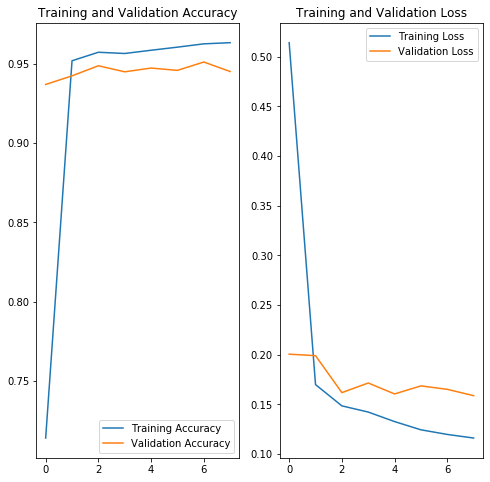

In [8]:
epochs_range = range(epochs_num)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [9]:
predictions = model.predict(validation_datagen)
pred_classes = np.round(predictions)
#pred_classes = numpy.argmax(predictions, axis=1)
#Falls es mehrere Klassen gibt und das Model mit softmax im Output Layer arbeitet. 
#Da hier binär klassifiziert wurde nicht notwendig.

true_classes = validation_datagen.classes
class_labels = list(validation_datagen.class_indices.keys())

In [10]:
cm_tf = tf.math.confusion_matrix(true_classes, pred_classes, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None)
print(cm_tf)

tf.Tensor(
[[2532  223]
 [  80 2675]], shape=(2, 2), dtype=int32)


In [11]:
from sklearn.metrics import confusion_matrix as confusion_matrix_skl

cm_skl = confusion_matrix_skl(true_classes, pred_classes)
print(cm_skl)

[[2532  223]
 [  80 2675]]


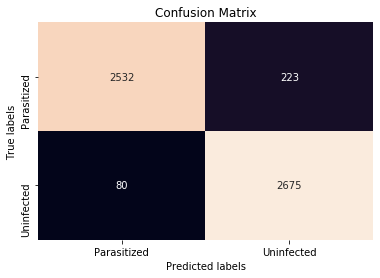

In [12]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm_skl, annot=True, ax = ax, cbar=False, fmt='d') 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Parasitized', 'Uninfected']);
ax.yaxis.set_ticklabels(['Parasitized', 'Uninfected']);

In [13]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

 Parasitized       0.97      0.92      0.94      2755
  Uninfected       0.92      0.97      0.95      2755

    accuracy                           0.95      5510
   macro avg       0.95      0.95      0.94      5510
weighted avg       0.95      0.95      0.94      5510

